# Classification Project

In [479]:
# munging imports
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

# modeling imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Data Cleaning, EDA

In [480]:
df = pd.read_csv('bgg_db.csv')

In [481]:
df.head()

,game_id,bgg_url,names,min_players,max_players,avg_time,min_time,max_time,year,avg_rating,...,thumb_url,age,mechanic,owned,category,designer,publisher,weight,expands,reimplements
0,1,https://boardgamegeek.com/boardgame/1,Die Macher,3,5,240,240,240,1986,7.62437,...,https://cf.geekdo-images.com/thumb/img/Y2pmp3_...,14,"Area Majority / Influence, Auction/Bidding, Di...",6615,"Economic, Negotiation, Political",Karl-Heinz Schmiel,Hans im Glück,4.3373,NaN,NaN
1,2,https://boardgamegeek.com/boardgame/2,Dragonmaster,3,4,30,30,30,1981,6.61497,...,https://cf.geekdo-images.com/thumb/img/2tQqL6w...,12,Trick-taking,1224,"Card Game, Fantasy","G. W. ""Jerry"" D'Arcey",E.S. Lowe,1.9630,NaN,2174.0
2,3,https://boardgamegeek.com/boardgame/3,Samurai,2,4,60,30,60,1998,7.44113,...,https://cf.geekdo-images.com/thumb/img/BOzp5hz...,10,"Area Majority / Influence, Hand Management, Se...",14500,"Abstract Strategy, Medieval",Reiner Knizia,Fantasy Flight Games,2.4940,NaN,NaN
3,4,https://boardgamegeek.com/boardgame/4,Tal der Könige,2,4,60,60,60,1992,6.60429,...,https://cf.geekdo-images.com/thumb/img/aqEMohP...,12,"Action Points, Area Majority / Influence, Auct...",607,Ancient,Christian Beierer,KOSMOS,2.6667,NaN,NaN
4,5,https://boardgamegeek.com/boardgame/5,Acquire,2,6,90,90,90,1964,7.34541,...,https://cf.geekdo-images.com/thumb/img/ZODhu5g...,12,"Hand Management, Investment, Market, Ownership...",22352,Economic,Sid Sackson,3M,2.5066,NaN,NaN


In [482]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116455 entries, 0 to 116454
Data columns (total 24 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   game_id       116455 non-null  int64  
 1   bgg_url       116455 non-null  object 
 2   names         116455 non-null  object 
 3   min_players   116455 non-null  int64  
 4   max_players   116455 non-null  int64  
 5   avg_time      116455 non-null  int64  
 6   min_time      116455 non-null  int64  
 7   max_time      116455 non-null  int64  
 8   year          116455 non-null  int64  
 9   avg_rating    116455 non-null  float64
 10  geek_rating   116455 non-null  float64
 11  num_votes     116455 non-null  int64  
 12  rank          18789 non-null   float64
 13  image_url     115577 non-null  object 
 14  thumb_url     115577 non-null  object 
 15  age           116455 non-null  int64  
 16  mechanic      99307 non-null   object 
 17  owned         116455 non-null  int64  
 18  cate

In [483]:
df['expands'].fillna((0), inplace = True)

In [484]:
df['reimplements'].fillna((0), inplace = True)

In [485]:
df.describe()

,game_id,min_players,max_players,avg_time,min_time,max_time,year,avg_rating,geek_rating,num_votes,rank,age,owned,weight,expands,reimplements
count,116455.000000,116455.000000,116455.000000,1.164550e+05,116455.000000,1.164550e+05,116455.000000,116455.000000,116455.000000,116455.000000,18789.000000,116455.00000,116455.000000,116455.000000,116455.000000,116455.000000
mean,128880.065914,1.971689,6.053291,8.696503e+01,45.190460,8.617065e+01,1841.932935,4.633683,1.251105,152.281525,9394.762946,7.65123,310.465983,0.857445,23300.607282,2872.799854
std,97581.272282,0.839405,47.216350,6.552930e+03,540.149919,6.552935e+03,545.378078,2.971534,2.366411,1373.709970,5424.176947,5.01057,2036.012190,1.159118,61581.246702,21881.471654
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,-3500.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,31571.500000,2.000000,2.000000,1.000000e+01,10.000000,1.000000e+01,1991.000000,1.000000,0.000000,1.000000,4698.000000,4.00000,2.000000,0.000000,0.000000,0.000000
50%,125747.000000,2.000000,4.000000,3.000000e+01,30.000000,3.000000e+01,2009.000000,5.692000,0.000000,3.000000,9395.000000,8.00000,10.000000,0.000000,0.000000,0.000000
75%,214553.500000,2.000000,6.000000,6.000000e+01,60.000000,6.000000e+01,2015.000000,6.990810,0.000000,22.000000,14092.000000,12.00000,81.000000,1.777800,0.000000,0.000000
max,307687.000000,50.000000,11299.000000,1.576800e+06,157680.000000,1.576800e+06,2022.000000,10.000000,8.576860,93524.000000,18789.000000,90.00000,139881.000000,5.000000,307293.000000,307544.000000


<AxesSubplot:>

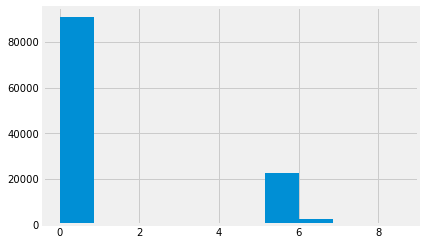

In [486]:
df.geek_rating.hist()

In [487]:
df = df[['names', 'min_players', 'max_players', 'avg_time','min_time', 'max_time', 'year', 'avg_rating', 
        'geek_rating','num_votes', 'rank', 'age', 'mechanic','owned', 'category', 'designer', 'publisher', 
        'weight', 'expands','reimplements']]

In [488]:
df_slim = df[(df['geek_rating'] > 0)]

In [489]:
df_slim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25543 entries, 0 to 115788
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   names         25543 non-null  object 
 1   min_players   25543 non-null  int64  
 2   max_players   25543 non-null  int64  
 3   avg_time      25543 non-null  int64  
 4   min_time      25543 non-null  int64  
 5   max_time      25543 non-null  int64  
 6   year          25543 non-null  int64  
 7   avg_rating    25543 non-null  float64
 8   geek_rating   25543 non-null  float64
 9   num_votes     25543 non-null  int64  
 10  rank          18789 non-null  float64
 11  age           25543 non-null  int64  
 12  mechanic      23447 non-null  object 
 13  owned         25543 non-null  int64  
 14  category      25291 non-null  object 
 15  designer      24405 non-null  object 
 16  publisher     25543 non-null  object 
 17  weight        25543 non-null  float64
 18  expands       25543 non-n

In [490]:
df_slim.max_players.sort_values().tail()

65897    200
3501     362
26302    999
22985    999
80904    999
Name: max_players, dtype: int64

In [491]:
df_slim = df_slim[df_slim['max_players']<400]

In [492]:
df_slim = df_slim[df_slim['avg_time'] < 60000]

In [493]:
df_slim.year.sort_values().head(20)

2136    -3500
5044    -3000
2134    -3000
172     -2200
18316   -1400
3512    -1400
10960   -1300
4944     -200
19744    -100
26312       0
26311       0
37263       0
26310       0
26288       0
26119       0
4880        0
26043       0
9850        0
25834       0
25788       0
Name: year, dtype: int64

In [494]:
df_slim = df_slim[df_slim['year'] >= 0]

<AxesSubplot:>

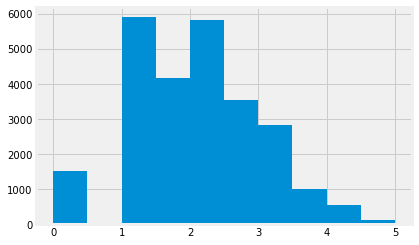

In [495]:
df_slim.weight.hist()

In [496]:
df_slim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25529 entries, 0 to 115788
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   names         25529 non-null  object 
 1   min_players   25529 non-null  int64  
 2   max_players   25529 non-null  int64  
 3   avg_time      25529 non-null  int64  
 4   min_time      25529 non-null  int64  
 5   max_time      25529 non-null  int64  
 6   year          25529 non-null  int64  
 7   avg_rating    25529 non-null  float64
 8   geek_rating   25529 non-null  float64
 9   num_votes     25529 non-null  int64  
 10  rank          18775 non-null  float64
 11  age           25529 non-null  int64  
 12  mechanic      23434 non-null  object 
 13  owned         25529 non-null  int64  
 14  category      25277 non-null  object 
 15  designer      24391 non-null  object 
 16  publisher     25529 non-null  object 
 17  weight        25529 non-null  float64
 18  expands       25529 non-n

<AxesSubplot:>

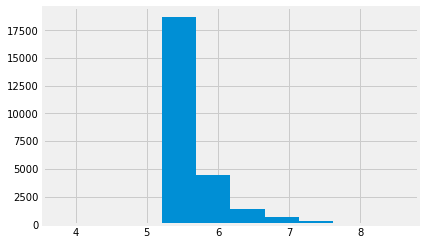

In [497]:
df_slim.geek_rating.hist()

The target of the model is the geek_rating and the other numerical features will be the predictors of the baseline model

# Baselining and model building

In [689]:
X = df_slim[['min_players', 'max_players', 'avg_time','min_time', 'max_time',
             'year', 'age', 'weight','expands', 'num_votes', 'owned',
             'reimplements']]
y_raw = df_slim[['geek_rating']]

In [690]:
y_raw.geek_rating

0         7.15383
1         5.80921
2         7.24689
3         5.70264
4         7.16840
           ...   
113607    5.55593
114664    5.57559
114802    5.53111
114865    5.71095
115788    5.64651
Name: geek_rating, Length: 25529, dtype: float64

In [691]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25529 entries, 0 to 115788
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   min_players   25529 non-null  int64  
 1   max_players   25529 non-null  int64  
 2   avg_time      25529 non-null  int64  
 3   min_time      25529 non-null  int64  
 4   max_time      25529 non-null  int64  
 5   year          25529 non-null  int64  
 6   age           25529 non-null  int64  
 7   weight        25529 non-null  float64
 8   expands       25529 non-null  float64
 9   num_votes     25529 non-null  int64  
 10  owned         25529 non-null  int64  
 11  reimplements  25529 non-null  float64
dtypes: float64(3), int64(9)
memory usage: 3.8 MB


In [692]:
X_train, X_test, y_train_raw, y_test_raw = train_test_split(X, y_raw, test_size = .2)

In [693]:
y_raw.head()

,geek_rating
0,7.15383
1,5.80921
2,7.24689
3,5.70264
4,7.16840


In [694]:
y_train_raw.mean()

geek_rating    5.704216
dtype: float64

In [695]:
y_train_raw.median()

geek_rating    5.56708
dtype: float64

In [696]:
y_train_raw['geek_rating'] = np.where(y_train_raw['geek_rating'] > y_train_raw['geek_rating'].median() , 1, 0)

<ipython-input-696-9dbfd970f69c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train_raw['geek_rating'] = np.where(y_train_raw['geek_rating'] > y_train_raw['geek_rating'].median() , 1, 0)


In [697]:
y_train = y_train_raw['geek_rating']

In [698]:
y_test_raw['geek_rating'] = np.where(y_test_raw['geek_rating'] > y_test_raw['geek_rating'].median(), 1, 0)

<ipython-input-698-5d6fb57ff8b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test_raw['geek_rating'] = np.where(y_test_raw['geek_rating'] > y_test_raw['geek_rating'].median(), 1, 0)


In [699]:
y_test = y_test_raw['geek_rating']

In [700]:
type(y_train)

pandas.core.series.Series

In [701]:
y_train.shape

(20423,)

In [702]:
y_test.shape

(5106,)

In [703]:
X_train.shape

(20423, 12)

In [704]:
y_train.value_counts()

0    10212
1    10211
Name: geek_rating, dtype: int64

In [705]:
type(y_test)

pandas.core.series.Series

In [706]:
df_slim['g_rate'] = np.where(df_slim['geek_rating'] > df_slim['geek_rating'].median() , 1, 0)

In [707]:
y = df_slim['g_rate']

The train and test datasets are ready for baselining. Lets try some basic models and metrics which are possibly a good fit for the data.

In [517]:
# Fit all possible model with cross validation on data to see which basic model performing the best
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_test_scaled = scaler.transform(X_test.values)


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


lm1 = LogisticRegression(C=1000, solver='liblinear')
lm1.fit(X_train, y_train)


decisiontree = DecisionTreeClassifier(max_depth=4)
decisiontree.fit(X_train, y_train)


randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)

RandomForestClassifier()

In [518]:
cross_val_score(knn, X, y,
                cv=5, 
                scoring='accuracy')

cross_val_score(knn, X, y, 
                cv=5, 
                scoring='f1') 

print('10 nearest neighbors validation metrics: \n Accuracy: %.4f \n F1: %.4f' %
        (np.mean(cross_val_score(knn, X, y, scoring='accuracy')), 
         np.mean(cross_val_score(knn, X, y, scoring='f1')))
     )


print('\n')


cross_val_score(lm1, X, y,
                cv=5, 
                scoring='accuracy')

cross_val_score(lm1, X, y, 
                cv=5, 
                scoring='f1') 

print('Logistic regression validation metrics: \n Accuracy: %.4f \n F1: %.4f' %
        (np.mean(cross_val_score(lm1, X, y, scoring='accuracy')), 
         np.mean(cross_val_score(lm1, X, y, scoring='f1')))
     )


print('\n')


cross_val_score(decisiontree, X, y,
                cv=5, 
                scoring='accuracy')

cross_val_score(decisiontree, X, y, 
                cv=5, 
                scoring='f1') 

print('Decision tree validation metrics: \n Accuracy: %.4f \n F1: %.4f' %
        (np.mean(cross_val_score(decisiontree, X, y, scoring='accuracy')), 
         np.mean(cross_val_score(decisiontree, X, y, scoring='f1')))
     )


print('\n')


cross_val_score(randomforest, X, y,
                cv=5, 
                scoring='accuracy')

cross_val_score(randomforest, X, y, 
                cv=5, 
                scoring='f1') 

print('Random Forest validation metrics: \n Accuracy: %.4f \n F1: %.4f' %
        (np.mean(cross_val_score(randomforest, X, y, scoring='accuracy')), 
         np.mean(cross_val_score(randomforest, X, y, scoring='f1')))
     )

10 nearest neighbors validation metrics: 
 Accuracy: 0.7856 
 F1: 0.7868


Logistic regression validation metrics: 
 Accuracy: 0.7890 
 F1: 0.7767


Decision tree validation metrics: 
 Accuracy: 0.7952 
 F1: 0.7272


Random Forest validation metrics: 
 Accuracy: 0.8078 
 F1: 0.7890


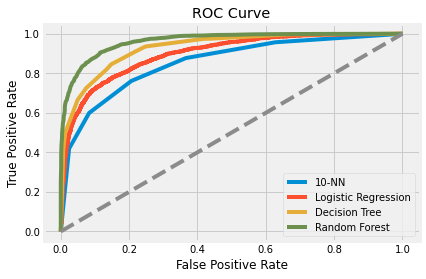

In [519]:
fpr, tpr, _ = roc_curve(y_test, knn.predict_proba(X_test_scaled)[:,1])
plt.plot(fpr, tpr)

fpr, tpr, _ = roc_curve(y_test, lm1.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)

fpr, tpr, _ = roc_curve(y_test, decisiontree.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)

fpr, tpr, _ = roc_curve(y_test, randomforest.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)


x = np.linspace(0,1, 100000)
plt.plot(x, x, linestyle='--')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['10-NN','Logistic Regression','Decision Tree','Random Forest'])

As the data is balanced and there is no importance differences between positive and negative events the chosen metrics will be <b>accuracy</b> .

The size of the data, the fact that interpretability is not as important, (in the way that we don't need to explain for the users how the different features influences the output) and the focus can be on the high performance the chosen model is <b>random forest</b>

The ROC Curve confirms as well that random Forest model works the best for the selected dataset.

In [520]:
def make_confusion_matrix(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['legit', 'fraud'],
           yticklabels=['legit', 'fraud']);
    plt.xlabel('prediction')
    plt.ylabel('actual')

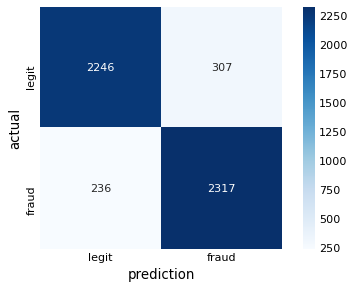

In [521]:
make_confusion_matrix(randomforest, threshold=0.5)

In [522]:

from ipywidgets import interactive, FloatSlider

interactive(lambda threshold: make_confusion_matrix(randomforest, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

The Random Forest gives a balanced confusion matrix as well. 

Now that we have the right model we can start to find the best parameters to it, so it gives us the strongest predictions.

In [523]:
!pip install tqdm

In [525]:
from tqdm import tqdm
import random

In [526]:
number_trees_search_space = [10*i for i in range(2, 25)]
accuracies = []
for number in tqdm(number_trees_search_space):
    classifier = RandomForestClassifier(n_estimators = number)
    scores = []
    rand_splits = [random.choice([i for i in range(2, 60)]) for j in range(5)]
    for split in rand_splits:
        x_train, x_val, Y_train, Y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=split)
        classifier.fit(x_train, Y_train)
        scores.append(classifier.score(x_val, Y_val))
    accuracies.append(sum(scores)/len(scores))
index = [i for i, val in enumerate(accuracies) if val==max(accuracies)][0]
optimal_n_estimators = number_trees_search_space[index]
print("Best number of estimators:  {}.".format(optimal_n_estimators))

100%|██████████| 23/23 [04:42<00:00, 12.29s/it]

Best number of estimators:  120.


In [527]:
x_train.shape

(16338, 12)

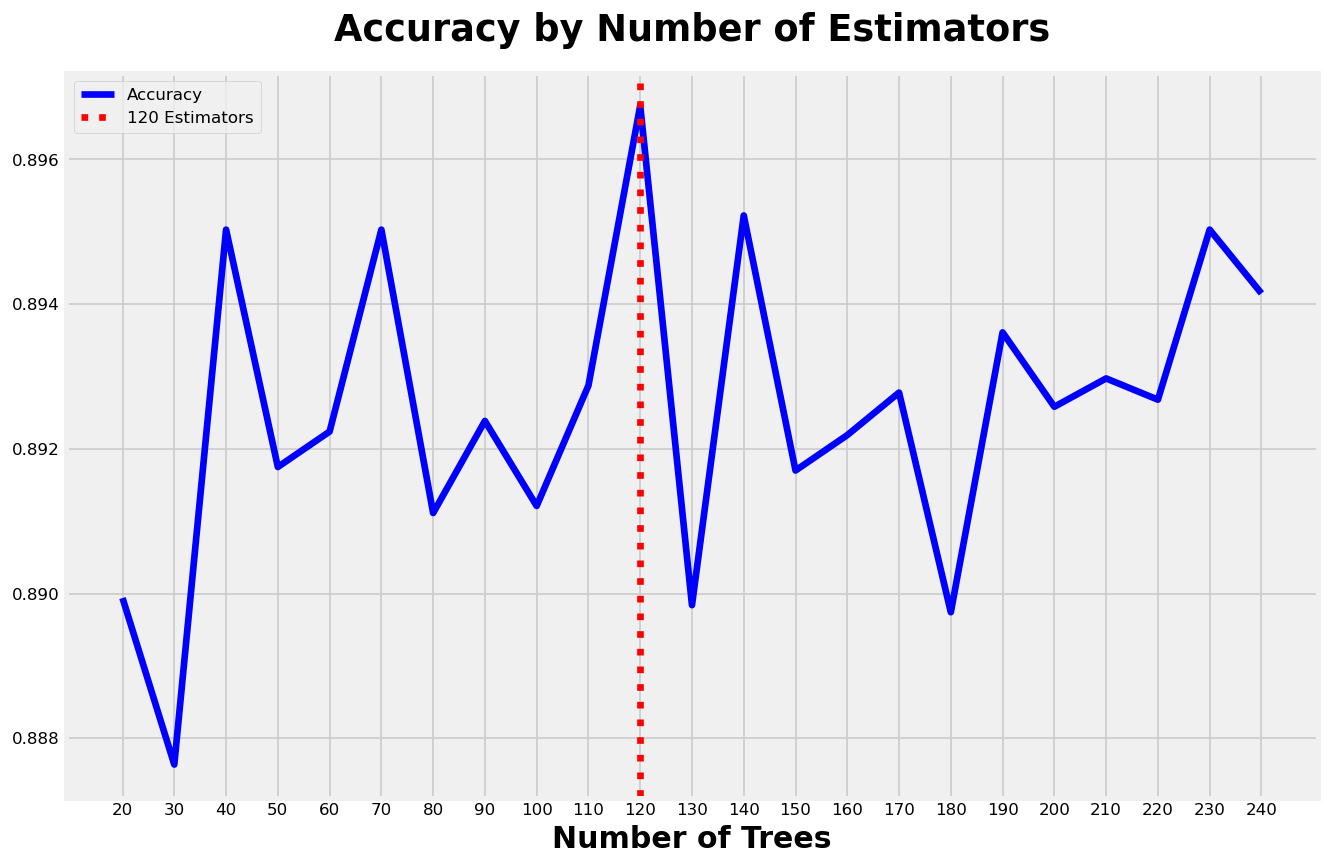

In [528]:
#Plot Accuracies by the amount of estimators
plt.figure(figsize=(12,8), dpi = 120)
plt.plot(accuracies, color = 'blue', label = 'Accuracy')
plt.axvline(index, ymin=-1, ymax=1, color = 'red', ls = ':', 
            label = "{} Estimators".format(optimal_n_estimators))
plt.xlabel("Number of Trees", size = 18, fontweight = 'bold', y = -1.03)
indices = np.arange(len(number_trees_search_space))
labels = []
for x in number_trees_search_space:
    if x % 2 == 0:
        labels.append(str(x))
    else:
        labels.append(" ")
plt.xticks(indices, labels)
plt.legend(loc = 'upper left')
plt.title("Accuracy by Number of Estimators", size = 22, fontweight = 'bold', y = 1.03);

In [530]:
randomforest = RandomForestClassifier(n_estimators = 120)
randomforest.fit(X_train, y_train)


RandomForestClassifier(n_estimators=120)

In [531]:
cross_val_score(randomforest, X, y,
                cv=5, 
                scoring='accuracy')

print('Random Forest validation metrics: \n Accuracy: %.4f' %
        (np.mean(cross_val_score(randomforest, X, y, scoring='accuracy'))))

Random Forest validation metrics: 
 Accuracy: 0.8083


In [532]:
for i in range(1,10):
    randomforest = RandomForestClassifier(n_estimators = 120, max_depth = i)
    randomforest.fit(X_train, y_train)
    
    cross_val_score(randomforest, X, y,
                    cv=5, 
                    scoring='accuracy')

    print(i , (np.mean(cross_val_score(randomforest, X, y, scoring='accuracy'))))

1 0.8316420734493383
2 0.8390848737422856
3 0.8374787665065739
4 0.8325049633374805
5 0.8307032382636012
6 0.8282745770085548
7 0.827334606249566
8 0.8217330305649515
9 0.8208322063919731


In [708]:
randomforest = RandomForestClassifier(n_estimators = 140, max_depth = 2)
randomforest.fit(X_train, y_train)

cross_val_score(randomforest, X, y,
                cv=5, 
                scoring='accuracy')

print('Random Forest validation metrics: \n Accuracy: %.4f' %
        (np.mean(cross_val_score(randomforest, X, y, scoring='accuracy'))))


Random Forest validation metrics: 
 Accuracy: 0.8376


In [709]:
feature_names = X.columns

In [710]:
feature_names

Index(['min_players', 'max_players', 'avg_time', 'min_time', 'max_time',
       'year', 'age', 'weight', 'expands', 'num_votes', 'owned',
       'reimplements'],
      dtype='object')

In [711]:
import time

start_time = time.time()
importances = randomforest.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in randomforest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.018 seconds


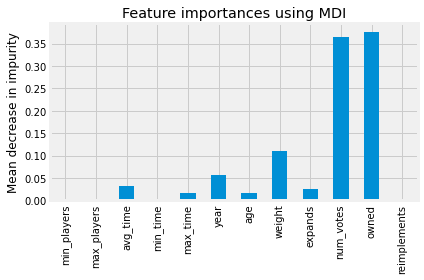

In [712]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [538]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    randomforest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 5.905 seconds


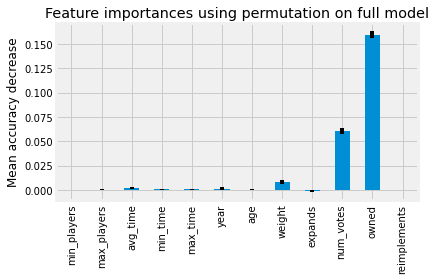

In [539]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

The feature importance chart shows that the most powerful features in the model are the values in the <b>'owned'</b> column (as how many people ownes the board game) and values in the <b>'num_votes'</b> column that shows that how many people gave a rating for the current board game.

Unfortunatly I just realized at that point that these features <b>shouldn't been involved in the model making process</b> as these features were measured <b>after</b> the board game was released, so they won't be useful features to predict how good the game will be rated.

As the features of the dataset still suggests to use Random Forest to the model, lets check how the accuracy changes without the the two features above.

In [546]:
X2 = df_slim[['min_players', 'max_players', 'avg_time','min_time', 'max_time',
             'year', 'age', 'weight','expands','reimplements']]
y2 = df_slim['g_rate']

In [547]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = .2)

In [557]:
randomforest = RandomForestClassifier(n_estimators = 140, max_depth = 2)
randomforest.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=140)

In [558]:
randomforest2 = RandomForestClassifier(n_estimators = 140, max_depth = 2)
randomforest2.fit(X_train2, y_train2)

cross_val_score(randomforest, X2, y2,
                cv=5, 
                scoring='accuracy')

print('Random Forest validation metrics: \n Accuracy: %.4f' %
        (np.mean(cross_val_score(randomforest, X2, y2, scoring='accuracy'))))

Random Forest validation metrics: 
 Accuracy: 0.5878


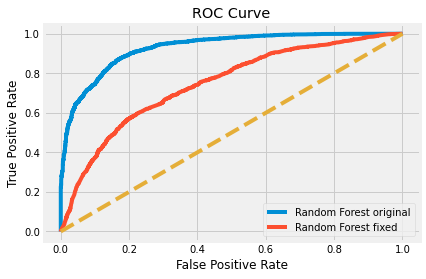

In [562]:
fpr, tpr, _ = roc_curve(y_test, randomforest.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)

fpr, tpr, _ = roc_curve(y_test2, randomforest2.predict_proba(X_test2)[:,1])
plt.plot(fpr, tpr)


x = np.linspace(0,1, 100000)
plt.plot(x, x, linestyle='--')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Random Forest original','Random Forest fixed'])

In [563]:
feature_names2 = X2.columns

In [564]:
feature_names2

Index(['min_players', 'max_players', 'avg_time', 'min_time', 'max_time',
       'year', 'age', 'weight', 'expands', 'reimplements'],
      dtype='object')

In [567]:
import time

start_time = time.time()
importances2 = randomforest2.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in randomforest2.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.024 seconds


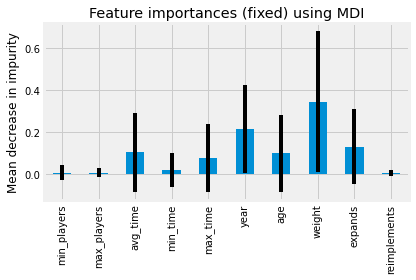

In [568]:
forest_importances = pd.Series(importances2, index=feature_names2)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances (fixed) using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

We can see the changes in the feature importancy chart that shows that the <b>'weight'</b> and <b>'year'</b> are the most powerful features in the model prediction, followed by the <b>'avg-time','expands'</b> and <b>'max_time'</b>.

In [571]:
df_slim.columns

Index(['names', 'min_players', 'max_players', 'avg_time', 'min_time',
       'max_time', 'year', 'avg_rating', 'geek_rating', 'num_votes', 'rank',
       'age', 'mechanic', 'owned', 'category', 'designer', 'publisher',
       'weight', 'expands', 'reimplements', 'g_rate'],
      dtype='object')

In [574]:
df_slim.publisher.value_counts().head(20)

Edge Entertainment                      661
(Self-Published)                        556
(Web published)                         414
Hasbro                                  402
Asmodee                                 367
Fantasy Flight Games                    344
GMT Games                               320
999 Games                               315
AMIGO                                   266
Decision Games (I)                      263
The Avalon Hill Game Co                 254
Ravensburger Spieleverlag GmbH          234
KOSMOS                                  228
Alderac Entertainment Group             228
Eagle-Gryphon Games                     219
Games Workshop Ltd.                     218
Queen Games                             198
ABACUSSPIELE                            195
(Public Domain)                         193
SPI (Simulations Publications, Inc.)    191
Name: publisher, dtype: int64

In [624]:
top_publisher = ['Edge Entertainment','(Self-Published)','(Web published)','Hasbro']

In [621]:
df_slim['pub_edge_ent'] = np.where(df_slim['publisher']== 'Edge Entertainment', 1, 0)

In [626]:
df_slim['pub_self'] = np.where(df_slim['publisher']== '(Self-Published)', 1, 0)

In [627]:
df_slim['pub_web'] = np.where(df_slim['publisher']== '(Web published)', 1, 0)

In [628]:
df_slim['pub_hasbro'] = np.where(df_slim['publisher']== 'Hasbro', 1, 0)

In [639]:
df_slim['pub_other'] = np.where(((df_slim['pub_edge_ent'] != 1) & (df_slim['pub_self'] != 1) & 
                                (df_slim['pub_web'] != 1) & (df_slim['pub_hasbro'] != 1)), 1, 0)

In [641]:
df_slim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25529 entries, 0 to 115788
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   names         25529 non-null  object 
 1   min_players   25529 non-null  int64  
 2   max_players   25529 non-null  int64  
 3   avg_time      25529 non-null  int64  
 4   min_time      25529 non-null  int64  
 5   max_time      25529 non-null  int64  
 6   year          25529 non-null  int64  
 7   avg_rating    25529 non-null  float64
 8   geek_rating   25529 non-null  float64
 9   num_votes     25529 non-null  int64  
 10  rank          18775 non-null  float64
 11  age           25529 non-null  int64  
 12  mechanic      23434 non-null  object 
 13  owned         25529 non-null  int64  
 14  category      25277 non-null  object 
 15  designer      24391 non-null  object 
 16  publisher     25529 non-null  object 
 17  weight        25529 non-null  float64
 18  expands       25529 non-n

In [645]:
X = df_slim[['min_players', 'max_players', 'avg_time','min_time', 'max_time','year', 'age', 'weight','expands', 
             'reimplements','pub_edge_ent','pub_self','pub_web', 'pub_hasbro', 'pub_other']]
y = df_slim['g_rate']

In [646]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [647]:
randomforest = RandomForestClassifier(n_estimators = 140, max_depth = 2)
randomforest.fit(X_train, y_train)

cross_val_score(randomforest, X, y,
                cv=5, 
                scoring='accuracy')

print('Random Forest validation metrics: \n Accuracy: %.4f' %
        (np.mean(cross_val_score(randomforest, X, y, scoring='accuracy'))))

Random Forest validation metrics: 
 Accuracy: 0.5996


In [650]:
feature_names = X.columns

In [651]:
import time

start_time = time.time()
importances = randomforest.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in randomforest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.017 seconds


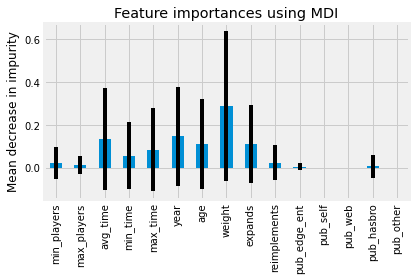

In [652]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [577]:
df_slim.category

0                          Economic, Negotiation, Political
1                                        Card Game, Fantasy
2                               Abstract Strategy, Medieval
3                                                   Ancient
4                                                  Economic
                                ...                        
113607                                           Party Game
114664    Card Game, Comic Book / Strip, Fantasy, Miniat...
114802                                                 Dice
114865    Adventure, Exploration, Nautical, Pirates, Travel
115788                                         Print & Play
Name: category, Length: 25529, dtype: object

In [578]:
categories_list = df_slim.category.values.tolist()

In [588]:
categories_str = str(categories_list)

In [599]:
categories_str = categories_str.replace("[", "").replace("]", "").replace('"', '')

In [600]:
categories_list = categories_str.split(", ")

In [602]:
len(set(categories_list))

85

In [608]:
import collections

In [609]:
occurrences = collections.Counter(categories_list)

In [618]:
import operator
sorted_occurrences = sorted(occurrences.items(), key=operator.itemgetter(1))

In [653]:
sorted_occurrences[-5:]

[('Fighting', 2862),
 ('Fantasy', 4218),
 ('Wargame', 4390),
 ('Expansion for Base-game', 5948),
 ('Card Game', 7587)]

In [666]:
df_slim['cat_card'] = np.where(df_slim['category'].str.contains('Card Game'), 1, 0)

In [669]:
df_slim['cat_exp'] = np.where(df_slim['category'].str.contains('Expansion for Base-game'), 1, 0)

In [670]:
df_slim['cat_war'] = np.where(df_slim['category'].str.contains('Wargame'), 1, 0)

In [671]:
df_slim['cat_fant'] = np.where(df_slim['category'].str.contains('Fantasy'), 1, 0)

In [678]:
df_slim['cat_other'] = np.where(((df_slim['cat_card'] != 1) & (df_slim['cat_exp'] != 1) & 
                                (df_slim['cat_war'] != 1) & (df_slim['cat_fant'] != 1)), 1, 0)

In [680]:
df_slim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25529 entries, 0 to 115788
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   names         25529 non-null  object 
 1   min_players   25529 non-null  int64  
 2   max_players   25529 non-null  int64  
 3   avg_time      25529 non-null  int64  
 4   min_time      25529 non-null  int64  
 5   max_time      25529 non-null  int64  
 6   year          25529 non-null  int64  
 7   avg_rating    25529 non-null  float64
 8   geek_rating   25529 non-null  float64
 9   num_votes     25529 non-null  int64  
 10  rank          18775 non-null  float64
 11  age           25529 non-null  int64  
 12  mechanic      23434 non-null  object 
 13  owned         25529 non-null  int64  
 14  category      25277 non-null  object 
 15  designer      24391 non-null  object 
 16  publisher     25529 non-null  object 
 17  weight        25529 non-null  float64
 18  expands       25529 non-n

In [681]:
df_slim.columns

Index(['names', 'min_players', 'max_players', 'avg_time', 'min_time',
       'max_time', 'year', 'avg_rating', 'geek_rating', 'num_votes', 'rank',
       'age', 'mechanic', 'owned', 'category', 'designer', 'publisher',
       'weight', 'expands', 'reimplements', 'g_rate', 'pub_edge_ent',
       'pub_self', 'pub_web', 'pub_hasbro', 'pub_other', 'cat_card', 'cat_exp',
       'cat_war', 'cat_fant', 'cat_other'],
      dtype='object')

In [713]:
X = df_slim[['min_players', 'max_players', 'avg_time','min_time', 'max_time','year', 'age', 'weight','expands', 
             'reimplements','pub_edge_ent','pub_self','pub_web', 'pub_hasbro', 'pub_other','cat_card', 'cat_exp',
       'cat_war', 'cat_fant', 'cat_other']]
y = df_slim['g_rate']

In [714]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [715]:
randomforest = RandomForestClassifier(n_estimators = 140, max_depth = 2)
randomforest.fit(X_train, y_train)

cross_val_score(randomforest, X, y,
                cv=5, 
                scoring='accuracy')

print('Random Forest validation metrics: \n Accuracy: %.4f' %
        (np.mean(cross_val_score(randomforest, X, y, scoring='accuracy'))))

Random Forest validation metrics: 
 Accuracy: 0.6041


In [716]:
feature_names = X.columns

In [717]:
start_time = time.time()
importances = randomforest.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in randomforest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.016 seconds


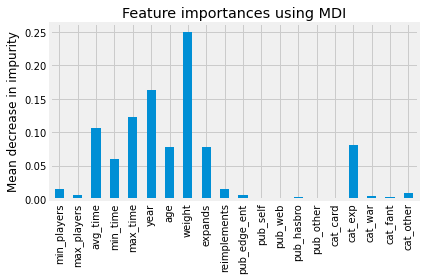

In [718]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

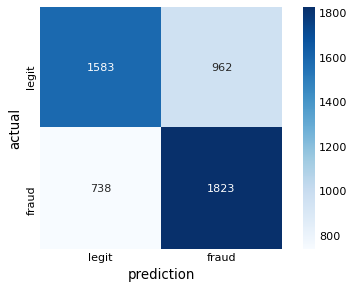

In [719]:
make_confusion_matrix(randomforest, threshold=0.5)